# Breast Cancer Dataset

---
## Descrição:
O câncer de mama é o câncer mais comum entre as mulheres no mundo. Representa 25% de todos os casos de câncer e afetou mais de 2,1 milhões de pessoas somente em 2015. Ele se manifesta quando as células da mama começam a crescer descontroladamente. Essas células geralmente formam tumores que podem ser vistos por raio-X ou sentidos como nódulos na região da mama.

O principal desafio para sua detecção é como classificar os tumores em malignos (cancerosos) ou benignos (não cancerosos). Solicitamos que você conclua a análise de classificação desses tumores usando aprendizado de máquina (com SVMs) e o Conjunto de Dados de Câncer de Mama de Wisconsin (Diagnóstico).

## Agradecimentos:
Este conjunto de dados foi obtido do Kaggle.

## Objetivo:
- Compreender o Conjunto de Dados e realizar a limpeza (se necessário).
    - Check sessão: 1 - Leitura da Base e Análise Exploratória
    - Check sessão: 2 - Tratamento do DF
    - Check sessão: 3 - Visualizações Gráficas

- Construir modelos de classificação para prever se o tipo de câncer é maligno ou benigno.

- Também refinar os hiperparâmetros e comparar as métricas de avaliação de vários algoritmos de classificação.

Link dataset Kaggle: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

Data de conclusão: Em andamento

---

## 1 - Leitura da Base e Análise Exploratória

In [83]:
#Bibliotecas para leitura, manipulação e gráficos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Bibliotecas para modelo - RandomForrest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

#Bibliotecas metricas de avaliação
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [66]:
#Cria DF com base no arquivo CSV
df_original = pd.read_csv('breast-cancer.csv')

#Leitura do head do DF
df_original.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


DF contem diversas colunas númericas, com escalas diferentes. Possivel tratamento de escala para implementação de modelos de ML.

In [67]:
#Verifica informações do DF - types, quantidade e etc
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

- Somente 1 coluna do tipo Object, que é exatamente a minha Variável Alvo.
- Sem dados Nulos.
- Coluna ID, não representa ganho para o Modelo, será dropada.

In [68]:
#Verifica estatisticas/ metricas do DF
df_original.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [69]:
#Verifica dados duplicados
df_original.duplicated().sum()

np.int64(0)

---
## 2 - Tratamento do DF

- Dropar coluna ID, que não tem relevancia para análise
- Alterar a columa "Diagnosis", para númerico

In [70]:
#Remover coluna ID
df_tratado = df_original.drop(columns='id', axis=1)

df_tratado.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [71]:
#Verificar balanceamento da minha variavel Alvo
df_tratado['diagnosis'].value_counts(normalize=True) * 100

diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64

Dados da categoria alvo, estão desbalanceados. Possivel necessidade de tratamento.

In [72]:
#Modifica a coluna "diagnosis", para receber valores de 0 e 1
df_tratado['diagnosis'] = df_tratado['diagnosis'].map({'B': 0, 'M': 1})

df_tratado.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


---
## 3 - Visualizações Gráficas

### 3.1 - HeatMap

Objetivo: Verificar correlações entre variaveis

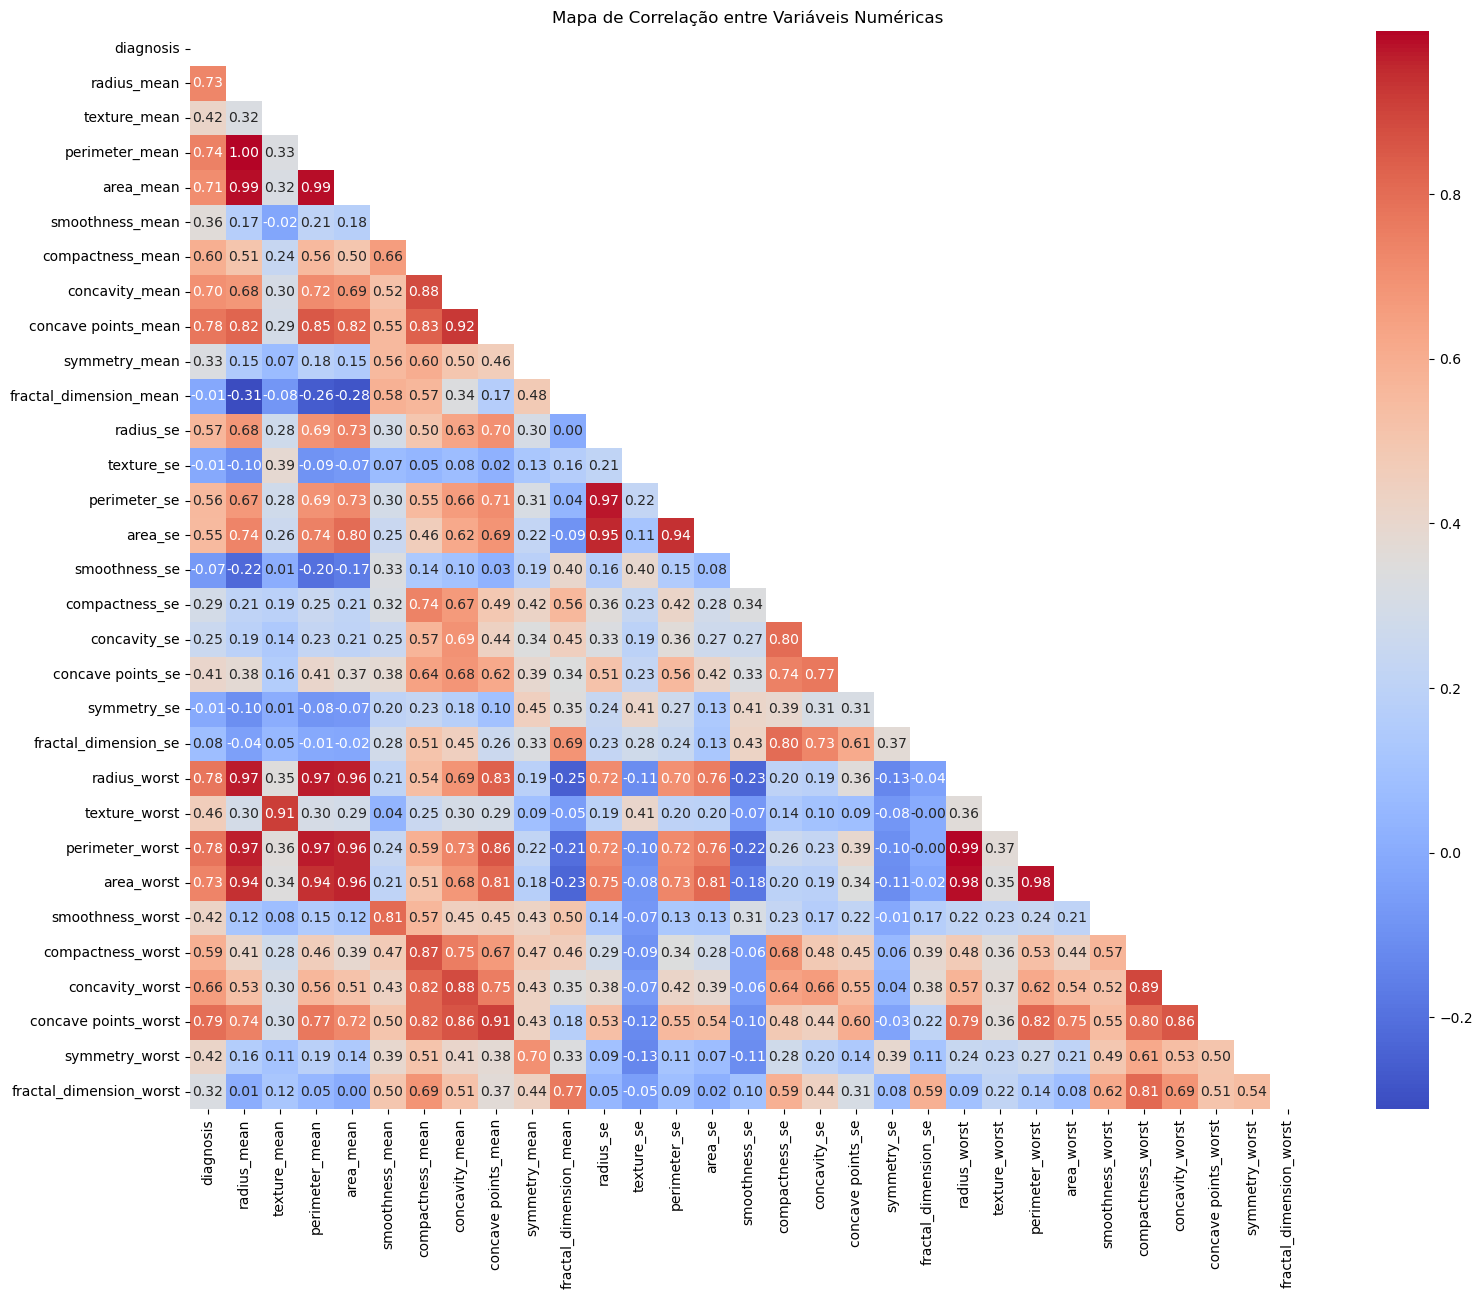

In [73]:
#Define nova variavel com a correlação
corr = df_tratado.corr()

#Cria mascara para parte superior do mapa
mask = np.triu(np.ones_like(corr, dtype=bool))

#Grafico de Heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(corr, 
            annot=True, 
            fmt='.2f',
            mask=mask,
            cmap='coolwarm')
plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.show()

---
## 4 - Modelo - RandomForrestClassifier

### 4.1 - Analise de Feature Importance

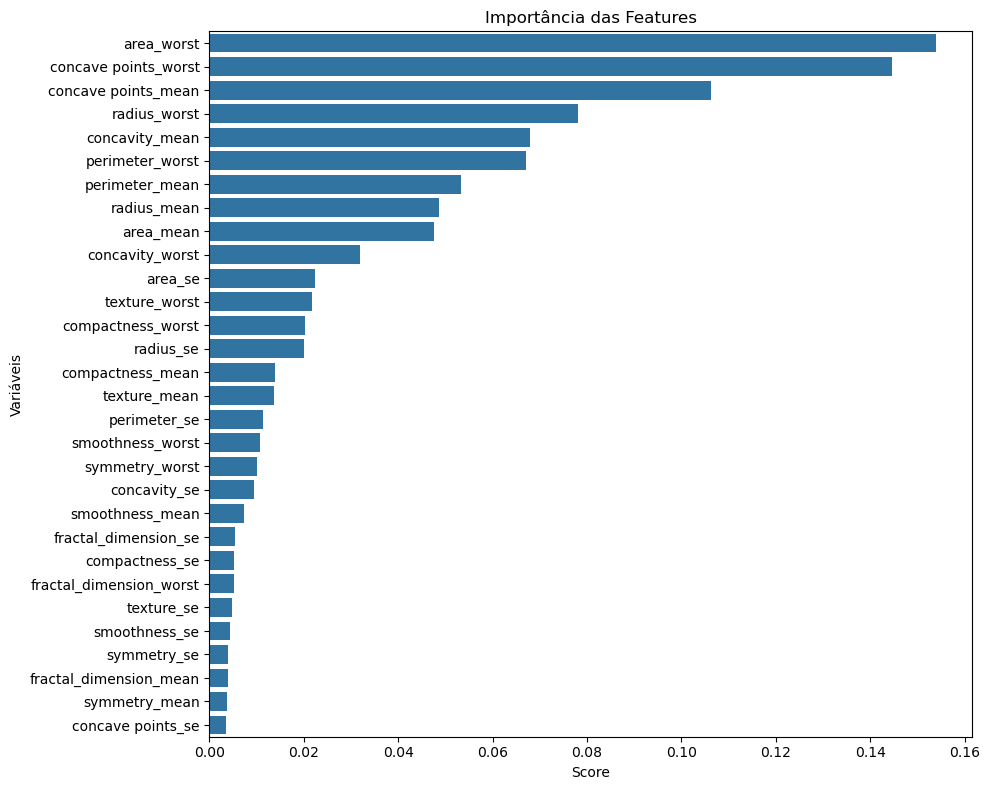

In [74]:
#Dividi a Base em X e y
X = df_tratado.drop('diagnosis', axis= 1)
y = df_tratado['diagnosis']

#Aplica train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)


#Usa os dados de Treino, para mapear as Features mais importantes
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)

#Feature importance a partir dos dados de Treino
features_importance = pd.Series(modelo_rf.feature_importances_, 
                                index=X_train.columns)
features_importance = features_importance.sort_values(ascending=False)

#Gráfico das Features
plt.figure(figsize=(10, 8))
sns.barplot(x=features_importance.values, y=features_importance.index)
plt.title('Importância das Features')
plt.xlabel('Score')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()

Apoio em conversa com ChatGPT.

#### Validar por performance
Melhor abordagem técnica:

- Teste modelos com diferentes números de features (ex: 5, 10, 15, todas).
- Compare acurácia, F1-score, ROC AUC etc.
- Escolha o ponto com melhor performance e menor complexidade.

Isso pode ser feito com um laço for e validação cruzada (cross_val_score).



### 4.2 - Teste de Feature Importance + Cross Validation

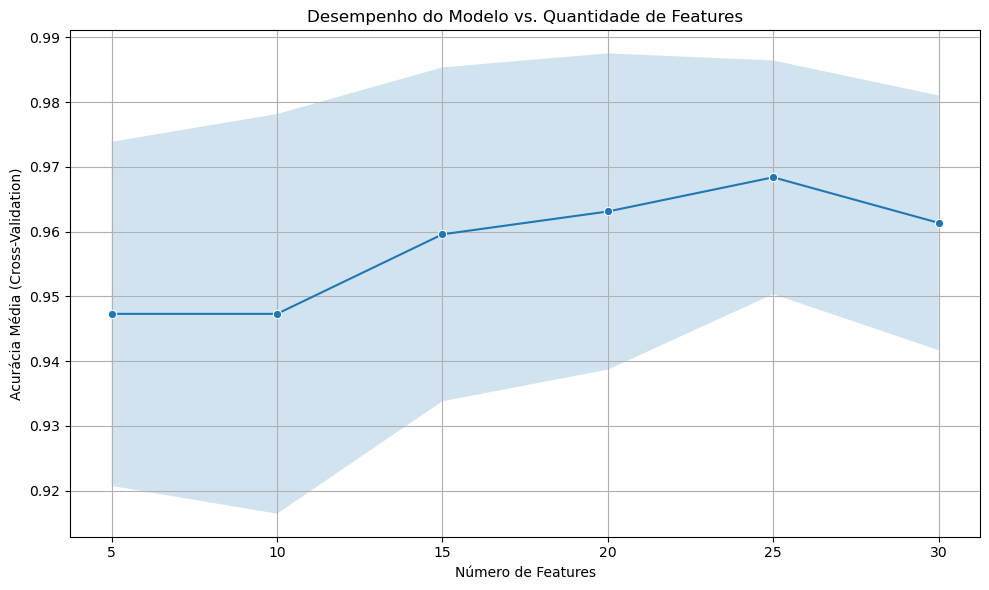

In [75]:
#Avaliar performance para diferentes número de Features
resultados = []

#Lista de quantidades de Features para testar
valores_n = list(range(5, len(X.columns) + 1, 5)) # de 5 em 5, até o total

#Laço para avaliação de n Features + Cross Validation
for n in valores_n:
    #Seleciona as top n Features
    top_n_features = features_importance.head(n).index
    X_n = X[top_n_features]

    #Avalia com cross_val_score
    scores = cross_val_score(RandomForestClassifier(random_state=42),
                             X_n, y,
                             cv=5, #Validação cruzado 5-fold
                             scoring='accuracy')
    
    #Guarda a média e desvio padrão
    resultados.append({
        'n_features': n,
        'accuracy_mean': scores.mean(),
        'accuracy_std': scores.std()
    })

#Converte o DF para plotar
df_resultados = pd.DataFrame(resultados)

#Gráfico de Desempenho
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_resultados, x='n_features', y='accuracy_mean', marker='o')
plt.fill_between(df_resultados['n_features'],
                 df_resultados['accuracy_mean'] - df_resultados['accuracy_std'],
                 df_resultados['accuracy_mean'] + df_resultados['accuracy_std'],
                 alpha=0.2)
plt.title('Desempenho do Modelo vs. Quantidade de Features')
plt.xlabel('Número de Features')
plt.ylabel('Acurácia Média (Cross-Validation)')
plt.grid(True)
plt.tight_layout()
plt.show()

- Melhor desempenho (ou quando ele se estabiliza, antes da queda), é com 25 Features.
- Acurácia média: 97%
- Variação (desvio padrão): entre 95% e 98,8%
- "Sombreamento" está estreito (95%-98,8%), o que indica:
    - Pouca variação entre os folds da validação cruzada
    - O modelo está estável


### 4.3 - Teste com o "Top 25 Features"

In [81]:
X = df_tratado.drop('diagnosis', axis=1)
y = df_tratado['diagnosis']

#Nova variavel com o Top 25 Features
top_25_features = features_importance.head(25).index

#Novo valor para X
X_final = X[top_25_features]

#Separar em treino e teste com novo X
X_train, X_test, y_train, y_test = train_test_split(X_final, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

#Treino com as Features selecionadas
modelo_final = RandomForestClassifier(random_state=42)
modelo_final.fit(X_train, y_train)

#Predição
y_pred = modelo_final.predict(X_test)

### 4.4 - Métricas de Avaliação (Top 25 Features)

Acurácia: 0.9736842105263158

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114


Matriz de Confusão:
 [[72  0]
 [ 3 39]]


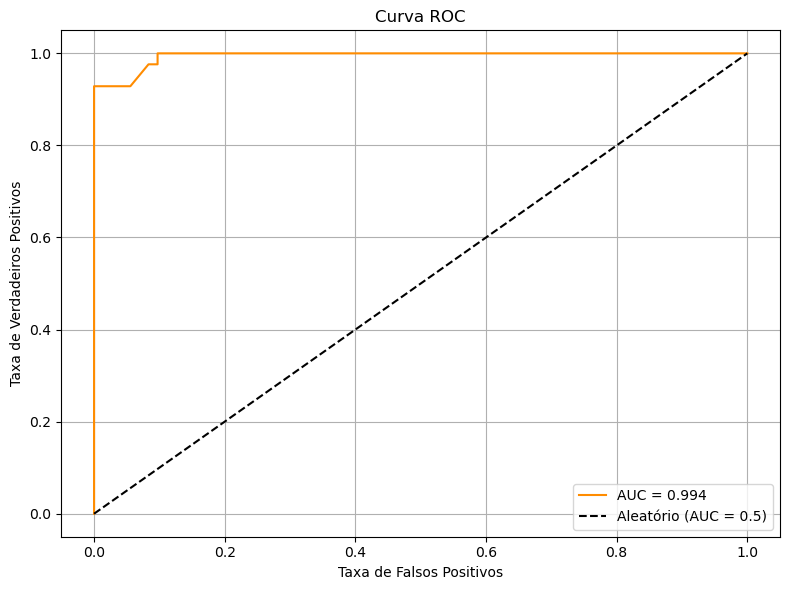

In [82]:
#Validação do Modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))

# Probabilidades da classe positiva
y_scores = modelo_final.predict_proba(X_test)[:, 1]

# Calcula a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plota
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório (AUC = 0.5)')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

Análise com apoio do Chatgpt:

#### Interpretação crítica (importante para diagnóstico de câncer)
- O modelo não cometeu nenhum falso positivo: isso é bom para evitar alarme falso.
- Mas ele cometeu 3 falsos negativos: classificou 3 casos malignos como benignos — o que é mais crítico em diagnóstico.

### Recomendações se for um projeto real de saúde:
Tentar aumentar o recall da classe 1 (maligno):
- Mesmo que a acurácia caia um pouco, vale a pena se conseguir reduzir falsos negativos.
- Tente ajustar o threshold de decisão ou usar técnicas como:
    - class_weight='balanced' no RandomForest,
    - Otimizar pelo F1-score da classe 1 ou ROC AUC.

### Testar outras métricas:
- roc_auc_score → mede a separabilidade entre classes.
- precision_recall_curve → ajuda a analisar o trade-off entre detectar mais malignos vs. evitar falsos positivos.

---
## Conclusão

### Lista de Técnicas utilizadas

- Leitura e exploração de dados:
    - Leitura do CSV com pandas
    - Análise de tipos de dados, valores nulos e duplicados
    - Estatísticas descritivas com describe()
    - Verificação de balanceamento da variável alvo

- Pré-processamento:
    - Remoção de coluna irrelevante (ID)
    - Conversão da variável alvo de categórica para numérica (map B/M para 0/1)

- Análise exploratória:
    - Heatmap de correlação entre variáveis numéricas (seaborn)

- Modelagem:
    - Separação em variáveis preditoras (X) e alvo (y)
    - Divisão em treino e teste (train_test_split)

- Seleção de features:
    - RandomForestClassifier para calcular feature importance
    - Teste de performance variando o número de features (laço for + validação cruzada)

- Validação:
    - Validação cruzada (cross_val_score, 5-fold) para comparar diferentes conjuntos de features

- Avaliação de modelo:
    - Métricas: acurácia, classification_report, matriz de confusão
    - Curva ROC e cálculo da AUC

- Visualização:
    - Gráficos de barras para feature importance
    - Gráfico de linha para desempenho vs. número de features
    - Curva ROC plotada

### Análise de Erros e Acertos

#### Acertos
- Fluxo bem estruturado: Segue o pipeline clássico: leitura, análise exploratória, tratamento, visualização, modelagem e avaliação.
- Documentação: Explica cada etapa, o que facilita o entendimento e a manutenção.
- Uso correto de bibliotecas: Usa pandas, seaborn, sklearn, etc., de forma adequada.
- Feature Importance + Cross Validation: Avalia o impacto do número de features, o que é prática avançada.
- Visualizações: Usa heatmap e gráficos para análise de correlação e performance.
- Métricas variadas: Não ficou só na acurácia, também usou matriz de confusão, classification_report e curva ROC.

---
#### Erros e Pontos de Atenção
- Desbalanceamento: Você notou o desbalanceamento, mas não aplicou técnicas para tratá-lo (ex: oversampling, undersampling, SMOTE, ou class_weight).
- Escalonamento: Não aplicou padronização/normalização nas features, o que pode ser importante para alguns modelos (menos crítico para RandomForest, mas essencial para SVM, KNN, etc.).
- Validação cruzada só na seleção de features: O modelo final foi avaliado só no holdout (train_test_split). O ideal é usar cross-validation também na etapa final para evitar overfitting.
- Threshold fixo: Usou o threshold padrão (0.5) para classificação. Poderia ajustar para reduzir falsos negativos, especialmente em problemas de saúde.
- Pouca experimentação de modelos: Só testou RandomForest. Poderia comparar com outros modelos (SVM, Logistic Regression, XGBoost, etc.).
- Sem análise de variáveis categóricas: Aqui não impactou, mas em outros projetos é fundamental.
- Sem pipeline: Não usou sklearn.pipeline para organizar pré-processamento + modelo, o que é boa prática para reprodutibilidade.

---
#### O que melhorar para virar Cientista de Dados Sênior
- Trate desbalanceamento: Use técnicas como SMOTE, class_weight, ou ajuste de threshold.
- Teste múltiplos modelos: Compare diferentes algoritmos e escolha o melhor via validação cruzada.
- Ajuste de hiperparâmetros: Use GridSearchCV ou RandomizedSearchCV para buscar os melhores parâmetros.
- Use pipelines: Organize pré-processamento e modelagem em pipelines do sklearn.
- Validação robusta: Sempre reporte resultados com cross-validation, não só holdout.
- Explique resultados: Interprete as métricas, principalmente recall/precision para problemas críticos.
- Documente decisões: Justifique escolhas de features, modelos e métricas.
- Automatize: Pense em modularizar e automatizar etapas para reuso e escalabilidade.
- Considere Explainability: Use SHAP, LIME ou feature importance para explicar decisões do modelo.
- Teste em dados externos: Se possível, valide o modelo em outro dataset para garantir generalização.

---
#### Resumo:
Seu notebook está acima da média para quem está começando/intermediário. Para chegar ao nível sênior, foque em robustez, comparação de modelos, tratamento de desbalanceamento, automação com pipelines e explicabilidade dos resultados.